## Building a QSAR model predictor of descriptors of Corona virus molecules.
####  Computational Aided Drug Discovery (CADD).

Inspired by work of Dr. Chanin Nantasenamat: https://github.com/dataprofessor


In [50]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#### Search for Corona Virus.


In [3]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,14.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
4,[],Human coronavirus 229E,Human coronavirus 229E,12.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,12.0,False,CHEMBL5209665,[],ORGANISM,31631
6,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


In [4]:
selected_target = targets.target_chembl_id[6]
selected_target

'CHEMBL3927'

In [5]:
activity = new_client.activity
molecules = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(molecules)

df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.6
129,None,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.1
130,None,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,11.5
131,None,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.7


In [7]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [8]:
len(df)

133

In [9]:
df.columns

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

#### save the resulting bioactive molecules data to a CSV file.

In [10]:
df.to_csv('corona virus bioactive molecules.csv', index=False)

In [11]:
df.isna().sum()

action_type                  133
activity_comment             133
activity_id                    0
activity_properties            0
assay_chembl_id                0
assay_description              0
assay_type                     0
assay_variant_accession      133
assay_variant_mutation       133
bao_endpoint                   0
bao_format                     0
bao_label                      0
canonical_smiles               0
data_validity_comment        106
data_validity_description    106
document_chembl_id             0
document_journal               0
document_year                  0
ligand_efficiency             27
molecule_chembl_id             0
molecule_pref_name           107
parent_molecule_chembl_id      0
pchembl_value                 27
potential_duplicate            0
qudt_units                     0
record_id                      0
relation                       0
src_id                         0
standard_flag                  0
standard_relation              0
standard_t

In [12]:
df = df.dropna(subset= ['standard_value' , 'canonical_smiles' , 'molecule_chembl_id'])

In [13]:
len(df.canonical_smiles.unique())

86

In [14]:
df = df.drop_duplicates(['canonical_smiles'])
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,None,None,12040781,[],CHEMBL2149727,Inhibition of SARS-CoV 3CLpro expressed in Esc...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,21.1
110,None,None,12040782,[],CHEMBL2149727,Inhibition of SARS-CoV 3CLpro expressed in Esc...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,226.7
111,None,None,12040783,[],CHEMBL2149727,Inhibition of SARS-CoV 3CLpro expressed in Esc...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,38.7
112,None,None,12040784,[],CHEMBL2149727,Inhibition of SARS-CoV 3CLpro expressed in Esc...,B,None,None,BAO_0000190,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,14.4


#### Combining the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame

In [15]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df = df[selection]
df

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0
...,...,...,...
109,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,21100.0
110,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,226700.0
111,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,38700.0
112,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,14400.0


In [16]:
df.isna().sum()

molecule_chembl_id    0
canonical_smiles      0
standard_value        0
dtype: int64

### Labeling compounds as either being active, inactive or intermediate:

The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [17]:
bioactivity_threshold = []
for i in df.standard_value:
    if float(i) >= 10000:
        bioactivity_threshold.append("inactive")
    elif float(i) <= 1000:
        bioactivity_threshold.append("active")
    else:
        bioactivity_threshold.append("intermediate")

In [18]:
len(df) , len(bioactivity_threshold)

(86, 86)

In [19]:
bioactivity_class = pd.Series(bioactivity_threshold , name= 'class')

df = df.reset_index()

df = pd.concat([df, bioactivity_class], axis=1)
df



,index,molecule_chembl_id,canonical_smiles,standard_value,class
0,0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...,...
81,109,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,21100.0,inactive
82,110,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,226700.0,inactive
83,111,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,38700.0,inactive
84,112,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,14400.0,inactive


#### Saving the final dataset

In [20]:
df.to_csv('Covid19 bioactive molecules dataset' , index= False)

In [21]:
df = pd.read_csv('Covid19 bioactive molecules dataset')
df

,index,molecule_chembl_id,canonical_smiles,standard_value,class
0,0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...,...
81,109,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,21100.0,inactive
82,110,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,226700.0,inactive
83,111,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,38700.0,inactive
84,112,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,14400.0,inactive


In [22]:
df = df.drop('index' , axis=1)
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate


#### Computing the molecular descriptors (fingerprints) of the compounds

#### Calculate Lipinski descriptors:

Evaluating the druglikeness of compounds based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile.the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

Molecular weight < 500 Dalton
Octanol-water partition coefficient (LogP) < 5
Hydrogen bond donors < 5
Hydrogen bond acceptors < 10

#### Calculate descriptors

In [23]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [24]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
81,338.359,3.40102,0.0,5.0
82,296.366,3.44330,0.0,3.0
83,276.291,4.09564,0.0,3.0
84,278.307,3.29102,0.0,3.0


In [25]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined 

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,21100.0,inactive,338.359,3.40102,0.0,5.0
82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,226700.0,inactive,296.366,3.44330,0.0,3.0
83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,38700.0,inactive,276.291,4.09564,0.0,3.0
84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,14400.0,inactive,278.307,3.29102,0.0,3.0


### Convert IC50 to pIC50:
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

* Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10−9.

* Take the molar value and apply -log10.

* Delete the standard_value column and create a new pIC50 column.




PIC50 is the approach for depicting the IC50 values as the negative logarithm of IC50 in molar concentration, therefore it makes data more understandable and compare the potency of different drugs at the same molar levels.

In [26]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [27]:
# Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

def normalize_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [28]:
# We will first apply the normalize_value() function so that the values in the standard_value column is normalized.

df_normalized = normalize_value(df_combined)
df_normalized

C:\Users\moham\AppData\Local\Temp\ipykernel_10940\2027132579.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,2000.0
...,...,...,...,...,...,...,...,...
81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,21100.0
82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,226700.0
83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,38700.0
84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,14400.0


In [29]:
df_final = pIC50(df_normalized)
df_final

C:\Users\moham\AppData\Local\Temp\ipykernel_10940\3764191868.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...
81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.675718
82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,3.644548
83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.412289
84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.841638


#### Removing the 'intermediate' bioactivity class


In [30]:
df = df_final[df_final['class'] != 'intermediate']
df

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...
81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.675718
82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,3.644548
83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.412289
84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.841638


In [31]:
df.to_csv('datafile_with_descriptors_and_2_classes_active_inactive.csv')

### Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors


Text(0, 0.5, 'Frequency')

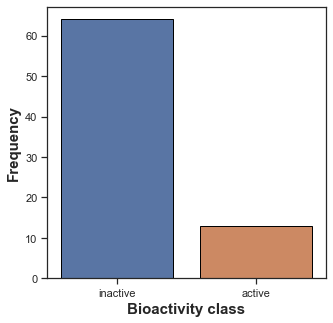

In [32]:
plt.figure(figsize=(5, 5))

sns.countplot(x='class', data=df, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=15, fontweight='bold')
plt.ylabel('Frequency', fontsize=15, fontweight='bold')

##### Scatter plot of MW versus LogP

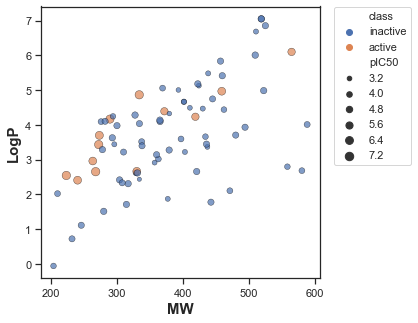

In [33]:
plt.figure(figsize=(5, 5))

sns.scatterplot(x='MW', y='LogP', data=df, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=15, fontweight='bold')
plt.ylabel('LogP', fontsize=15, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);

#### Box plot of pIC50 value versus bioactivity


Text(0, 0.5, 'pIC50 value')

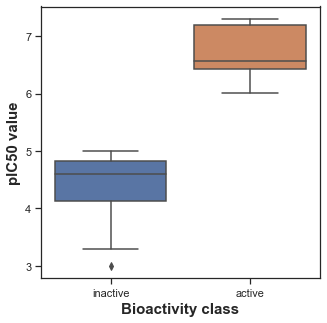

In [34]:
plt.figure(figsize=(5, 5))

sns.boxplot(x = 'class', y = 'pIC50', data = df)

plt.xlabel('Bioactivity class', fontsize=15, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=15, fontweight='bold')

#### Box plot of MW values versus bioactivity

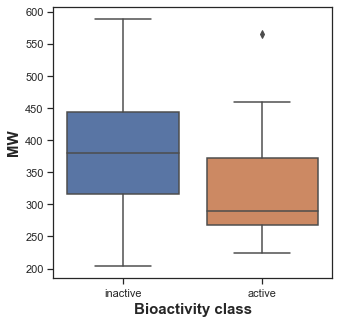

In [35]:
plt.figure(figsize=(5, 5))

sns.boxplot(x = 'class', y = 'MW', data = df)

plt.xlabel('Bioactivity class', fontsize=15, fontweight='bold')
plt.ylabel('MW', fontsize=15, fontweight='bold');

#### Box plot of LogP values versus bioactivity

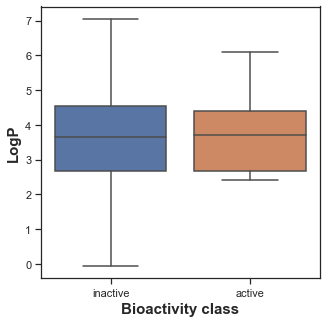

In [36]:
plt.figure(figsize=(5, 5))

sns.boxplot(x = 'class', y = 'LogP', data = df)

plt.xlabel('Bioactivity class', fontsize=15, fontweight='bold')
plt.ylabel('LogP', fontsize=15, fontweight='bold');

#### Box plot of number of H-donors values versus bioactivity.

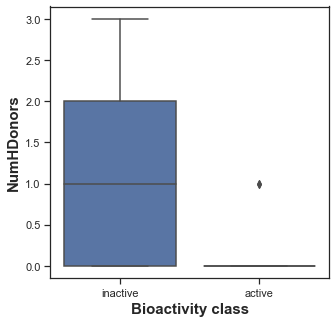

In [37]:
plt.figure(figsize=(5, 5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df)

plt.xlabel('Bioactivity class', fontsize=15, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=15, fontweight='bold');

#### Box plot of number of H-acceptors values versus bioactivity.

Text(0, 0.5, 'NumHAcceptors')

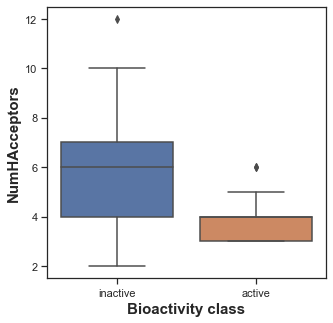

In [38]:
plt.figure(figsize=(5, 5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df)

plt.xlabel('Bioactivity class', fontsize=15, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=15, fontweight='bold')

#### Calculating fingerprint descriptors using PaDEL package.

In [39]:
import wget
import glob
import zipfile

url = 'https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip'
wget.download(url)

url = 'https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh'
wget.download(url)

files = glob.glob('*.zip')
print(files)



for file in files:
    print('Unzipping:',file)

    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall()
        
        
xml_files = glob.glob("*.xml") #return file paths named .xml
xml_files.sort()
print(xml_files)



#create a list and assign them to the xml files( to compute descriptors)
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']


fp = dict(zip(FP_list, xml_files)) #create a dictionary of all..

print(fp)


['fingerprints_xml.zip']
Unzipping: fingerprints_xml.zip
['AtomPairs2DFingerprintCount.xml', 'AtomPairs2DFingerprinter.xml', 'EStateFingerprinter.xml', 'ExtendedFingerprinter.xml', 'Fingerprinter.xml', 'GraphOnlyFingerprinter.xml', 'KlekotaRothFingerprintCount.xml', 'KlekotaRothFingerprinter.xml', 'MACCSFingerprinter.xml', 'PubchemFingerprinter.xml', 'SubstructureFingerprintCount.xml', 'SubstructureFingerprinter.xml']
{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml', 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml', 'EState': 'EStateFingerprinter.xml', 'CDKextended': 'ExtendedFingerprinter.xml', 'CDK': 'Fingerprinter.xml', 'CDKgraphonly': 'GraphOnlyFingerprinter.xml', 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml', 'KlekotaRoth': 'KlekotaRothFingerprinter.xml', 'MACCS': 'MACCSFingerprinter.xml', 'PubChem': 'PubchemFingerprinter.xml', 'SubstructureCount': 'SubstructureFingerprintCount.xml', 'Substructure': 'SubstructureFingerprinter.xml'}


In [65]:
fp['AtomPairs2D']

'AtomPairs2DFingerprinter.xml'

In [66]:
df.rename(columns = {'canonical_smiles':'CANONICAL_SMILES'}, inplace = True)  # rename smile column as CANONICAL_SMILES
df 

C:\Users\moham\AppData\Local\Temp\ipykernel_11592\371905643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'canonical_smiles':'CANONICAL_SMILES'}, inplace = True)  # rename smile column as CANONICAL_SMILES


,molecule_chembl_id,CANONICAL_SMILES,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...
81,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,4.675718
82,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,3.644548
83,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,4.412289
84,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,4.841638


In [40]:
from padelpy import padeldescriptor   #import downloaded padel descriptor

In [41]:
selection = ['canonical_smiles']
df_selection = df[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)
df_selection

,canonical_smiles
2,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21
3,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21
5,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21
7,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21
8,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21
...,...
81,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...
82,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C
83,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12
84,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1


In [46]:
fingerprint = 'Substructure'
 
fingerprint_output_file = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]
 


padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)


descriptors = pd.read_csv(fingerprint_output_file)
descriptors

,Name,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,...,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,AUTOGEN_molecule_1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
1,AUTOGEN_molecule_2,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
2,AUTOGEN_molecule_3,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
3,AUTOGEN_molecule_4,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
4,AUTOGEN_molecule_5,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,AUTOGEN_molecule_73,1,1,0,1,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,1
73,AUTOGEN_molecule_74,1,1,1,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
74,AUTOGEN_molecule_75,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
75,AUTOGEN_molecule_76,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1


In [47]:
descriptors = descriptors.drop('Name' , axis=1)

target = df['pIC50'].reset_index()

target

,index,pIC50
0,2,4.869666
1,3,4.882397
2,5,6.008774
3,7,6.022276
4,8,4.950782
...,...,...
72,81,4.675718
73,82,3.644548
74,83,4.412289
75,84,4.841638


In [48]:
df_descriptor = pd.concat([descriptors, target], axis=1)
df_descriptor


,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,...,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307,index,pIC50
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,2,4.869666
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,3,4.882397
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,5,6.008774
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,7,6.022276
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,8,4.950782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1,1,0,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,81,4.675718
73,1,1,1,1,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,82,3.644548
74,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,83,4.412289
75,1,0,1,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,84,4.841638


### Building the predictor model.

In [49]:
df_descriptor.to_csv('df_with_descriptors_and_target.csv', index=False)


In [68]:
df = pd.read_csv('df_with_descriptors_and_target.csv')
df.head(3)

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,...,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307,index,pIC50
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,2,4.869666
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,3,4.882397
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,5,6.008774


In [69]:
X = df.drop('pIC50', axis=1)
X

,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,...,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307,index
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,2
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,3
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,5
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,7
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1,1,0,1,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,81
73,1,1,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,82
74,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,83
75,1,0,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,84


In [70]:
y = df['pIC50']
y

0     4.869666
1     4.882397
2     6.008774
3     6.022276
4     4.950782
        ...   
72    4.675718
73    3.644548
74    4.412289
75    4.841638
76    4.675718
Name: pIC50, Length: 77, dtype: float64

In [71]:
X.shape , y.shape

((77, 308), (77,))

In [72]:
# Remove low variance features

from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))    
X = selection.fit_transform(X)

X.shape

(77, 16)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [104]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble     import RandomForestRegressor
from sklearn.tree         import DecisionTreeRegressor
from sklearn.svm          import SVR
from sklearn.neighbors    import KNeighborsRegressor



models= {"Linear Model": ElasticNet(),
         "Random Forest Regressor": RandomForestRegressor(),
         "Support Vector Regressor": SVR(),
         "Decision Tree Regressor": DecisionTreeRegressor(),
         "KNN Regressor": KNeighborsRegressor()}



In [65]:
# from sklearn.preprocessing import StandardScaler

# scaler= StandardScaler()

# X_train= scaler.fit_transform(X_train)
# X_test= scaler.transform(X_test)

In [105]:
def classify (models , X_train , X_test , y_train , y_test):
    
    model_scores= {}
    
    for name , model in models.items():

        model.fit(X_train , y_train)
    
        model_scores[name]= model.score(X_test , y_test)
        
    return model_scores

In [106]:
model_scores= classify(models=models,
                      X_train= X_train,
                      X_test= X_test,
                      y_train= y_train,
                      y_test= y_test)

model_scores

{'Linear Model': 0.1258870547583797,
 'Random Forest Regressor': 0.2949121766000644,
 'Support Vector Regressor': 0.23873263079114737,
 'Decision Tree Regressor': 0.0827373655865472,
 'KNN Regressor': 0.6543209826129848}

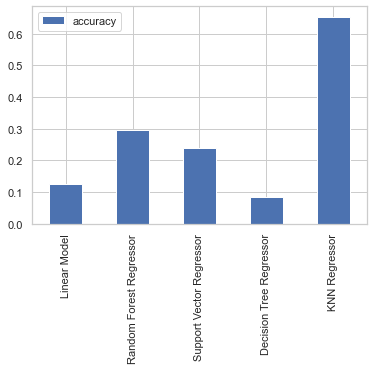

In [135]:
models_compare= pd.DataFrame(model_scores , index=['accuracy'])

models_compare.T.plot.bar();

#### KNN Regressor is the best model.


In [108]:
from sklearn.metrics import r2_score


regressor = KNeighborsRegressor()
regressor.fit(X_train , y_train)

y_pred= regressor.predict(X_test)


print(f'KNN r2_score is: {r2_score(y_test , y_pred) * 100 :.2f} %')

KNN r2_score is: 65.43 %


#### Findiding the best n for KNN.


In [109]:
knn_scores= []
for i in range (1 , 12):
    model= KNeighborsRegressor(n_neighbors= i)
    model.fit(X_train , y_train)
    y_pred= model.predict(X_test)

    r2_results= r2_score(y_test , y_pred)
    knn_scores.append(r2_results)
    
    print(f'the r2_score of {i} neighbor is: {r2_score(y_test , y_pred)*100 :.2f} %')

the r2_score of 1 neighbor is: 58.94 %
the r2_score of 2 neighbor is: 53.09 %
the r2_score of 3 neighbor is: 60.78 %
the r2_score of 4 neighbor is: 67.26 %
the r2_score of 5 neighbor is: 65.43 %
the r2_score of 6 neighbor is: 64.08 %
the r2_score of 7 neighbor is: 60.30 %
the r2_score of 8 neighbor is: 46.05 %
the r2_score of 9 neighbor is: 46.23 %
the r2_score of 10 neighbor is: 33.89 %
the r2_score of 11 neighbor is: 22.84 %


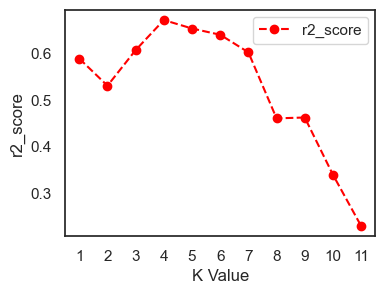

In [110]:
plt.figure(figsize=(4,3), dpi=100)
plt.plot(range(1,12), knn_scores ,label='r2_score' , color='red', marker='o', linestyle='--' )
plt.legend()
plt.ylabel('r2_score')
plt.xlabel("K Value")
plt.xticks(range(1,12));

### The best number of n-neighbour is 4.

In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

regressor = KNeighborsRegressor(n_neighbors= 4)
regressor.fit(X_train , y_train)

y_pred_4n= regressor.predict(X_test)


print(f'KNN r2_score of 4 n-neighbour is: {r2_score(y_test , y_pred_4n):.2f}')
print(f'mean squared error of 4 n-neighbour is: {mean_squared_error(y_test , y_pred_4n):.2f}')
print(f'mean absolute erro of 4 n-neighbour is: {mean_absolute_error(y_test , y_pred_4n):.2f}')
print(f'root mean squared error of 4 n-neighbour is: {np.sqrt(mean_squared_error(y_test , y_pred_4n)):.2f}')


KNN r2_score of 4 n-neighbour is: 0.67
mean squared error of 4 n-neighbour is: 0.26
mean absolute erro of 4 n-neighbour is: 0.37
root mean squared error of 4 n-neighbour is: 0.51


#### Scatter Plot of Experimental vs Predicted pIC50 Values.

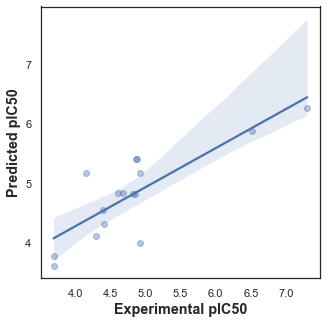

In [112]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_pred_4n, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.figure.set_size_inches(5, 5)
plt.show()

#### comparing other several ML algorithms to build regression models using lazypredict. 

In [140]:
import lazypredict
from lazypredict.Supervised import LazyRegressor


import warnings
warnings.filterwarnings("ignore")


model = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = model.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:02<00:00, 19.47it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 61, number of used features: 11
[LightGBM] [Info] Start training from score 4.774392
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [148]:
models.sort_values('R-Squared', ascending= False)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KNeighborsRegressor,9.42,0.44,0.67,0.03
SVR,10.03,0.40,0.69,0.02
PoissonRegressor,10.90,0.34,0.73,0.02
TweedieRegressor,10.93,0.34,0.73,0.02
NuSVR,11.04,0.33,0.73,0.02
RandomForestRegressor,11.16,0.32,0.74,0.25
RidgeCV,11.16,0.32,0.74,0.01
GammaRegressor,11.23,0.32,0.74,0.01
HuberRegressor,11.28,0.31,0.74,0.05


[(0.0, 1.0)]

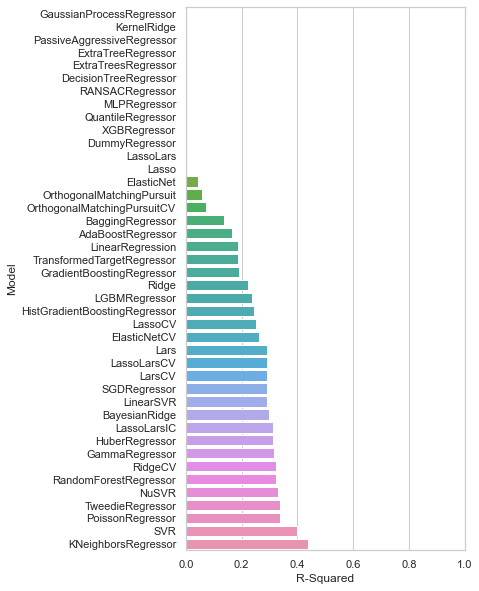

In [150]:
# Bar plot of R-squared values

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

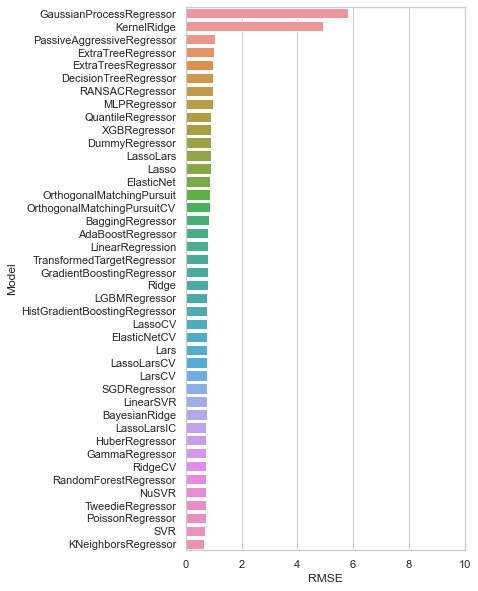

In [151]:
# Bar plot of RMSE values

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

## Conclusion:
The best regression model is K_nearest_neighbour regressor with k=4.